In [4]:
import numpy as np #for numpy arrays
import pandas as pd #for structured table (dataframe)
import matplotlib.pyplot as plt #for making plots
import seaborn as sns
from sklearn.cluster import KMeans #KMeans model

In [5]:
customer_data = pd.read_csv('Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
customer_data.shape

(200, 5)

In [7]:
new_data = customer_data.iloc[:,[3,4]].values #only concerned with annual income and spending score
new_data.shape

(200, 2)

C:\Users\shahp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


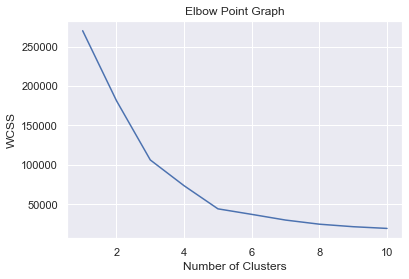

In [8]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=43)
    kmeans.fit(new_data)
    wcss.append(kmeans.inertia_)
    
sns.set()
plt.plot(range(1, 11), wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
#optimum number of clusters = 5

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y = kmeans.fit_predict(new_data)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


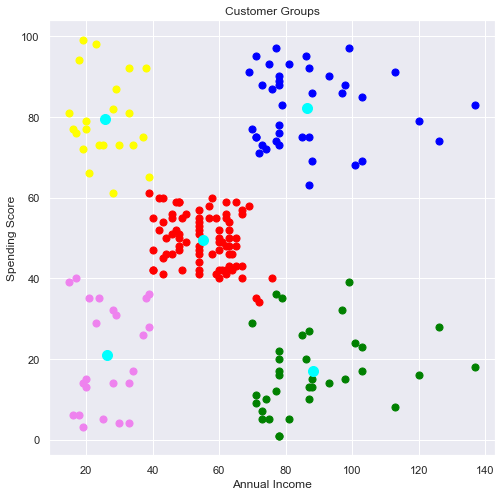

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(new_data[Y==0,0], new_data[Y==0,1], s=50, c='green', label='C 1')
plt.scatter(new_data[Y==1,0], new_data[Y==1,1], s=50, c='red', label='C 2')
plt.scatter(new_data[Y==2,0], new_data[Y==2,1], s=50, c='blue', label='C 3')
plt.scatter(new_data[Y==3,0], new_data[Y==3,1], s=50, c='yellow', label='C 4')
plt.scatter(new_data[Y==4,0], new_data[Y==4,1], s=50, c='violet', label='C 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 100, c = 'cyan', label='Centroid')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()